# 📊 Анализ рынка труда для Data-аналитиков в России (Октябрь 2025)

### Цель проекта
Провести комплексный анализ рынка труда для специалистов по анализу данных в России, чтобы ответить на ключевые вопросы:
*   Какие навыки наиболее востребованы?
*   Каковы зарплатные ожидания в зависимости от опыта?
*   Как зарплаты и требования различаются по регионам?

### 🚀 Интерактивный дашборд
Для более глубокого и интерактивного исследования данных был создан дашборд в Tableau.

**[Посмотреть дашборд на Tableau Public](https://public.tableau.com/views/Data-_17612546361120/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)**

In [3]:
# Импортируем необходимые библиотеки для анализа и визуализации
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем стиль и размер графиков для лучшего отображения
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'DejaVu Sans' # Используем шрифт, поддерживающий кириллицу

### 1. Загрузка и подготовка данных
Загружаем финальный, очищенный и обогащенный датасет. Этот файл уже содержит:
- Только вакансии с указанной зарплатой в рублях.
- Рассчитанную среднюю зарплату (gross).
- Извлеченные ключевые навыки.
- Географические координаты для каждого города.

In [4]:
# Загружаем данные из CSV-файла
try:
    df = pd.read_csv('vacancies_with_coords.csv')
    print("Датасет успешно загружен. Количество вакансий для анализа:", len(df))
except FileNotFoundError:
    print("Ошибка: Файл 'vacancies_with_coords.csv' не найден. Убедитесь, что он находится в той же папке.")

# Посмотрим на первые 5 строк, чтобы убедиться, что все в порядке
df.head()

Датасет успешно загружен. Количество вакансий для анализа: 705


,id,name,city,experience,employment,alternate_url,salary_avg,skill_SQL,skill_Python,skill_Pandas,skill_Excel,skill_Power BI,skill_Tableau,skill_A/B Tests,skill_Machine Learning,skill_Git,skill_English,latitude,longitude
0,126890294,Аналитик данных,Москва,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/126890294,235750.0,True,True,True,False,False,False,True,False,False,False,55.625578,37.606392
1,126883322,Аналитик данных,Нижний Новгород,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/126883322,161000.0,True,False,False,True,True,False,False,False,False,False,56.326482,44.005139
2,126877292,Аналитик данных,Санкт-Петербург,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/126877292,200000.0,True,True,False,False,True,True,False,False,False,False,59.960674,30.158655
3,126871489,Аналитик данных,Москва,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/126871489,200000.0,True,True,True,False,False,False,False,False,True,False,55.625578,37.606392
4,125832228,Аналитик данных,Краснодар,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/125832228,115000.0,True,True,True,True,True,False,True,False,False,False,45.035153,38.977240


### 2. Анализ зарплат по опыту работы
Один из ключевых вопросов — как опыт влияет на уровень дохода. Сгруппируем вакансии по требуемому опыту и рассчитаем среднюю зарплату для каждой группы.

Средняя зарплата по опыту:
experience
Более 6 лет           269341.0
Нет опыта              88000.0
От 1 года до 3 лет    125429.0
От 3 до 6 лет         195646.0
Name: salary_avg, dtype: float64


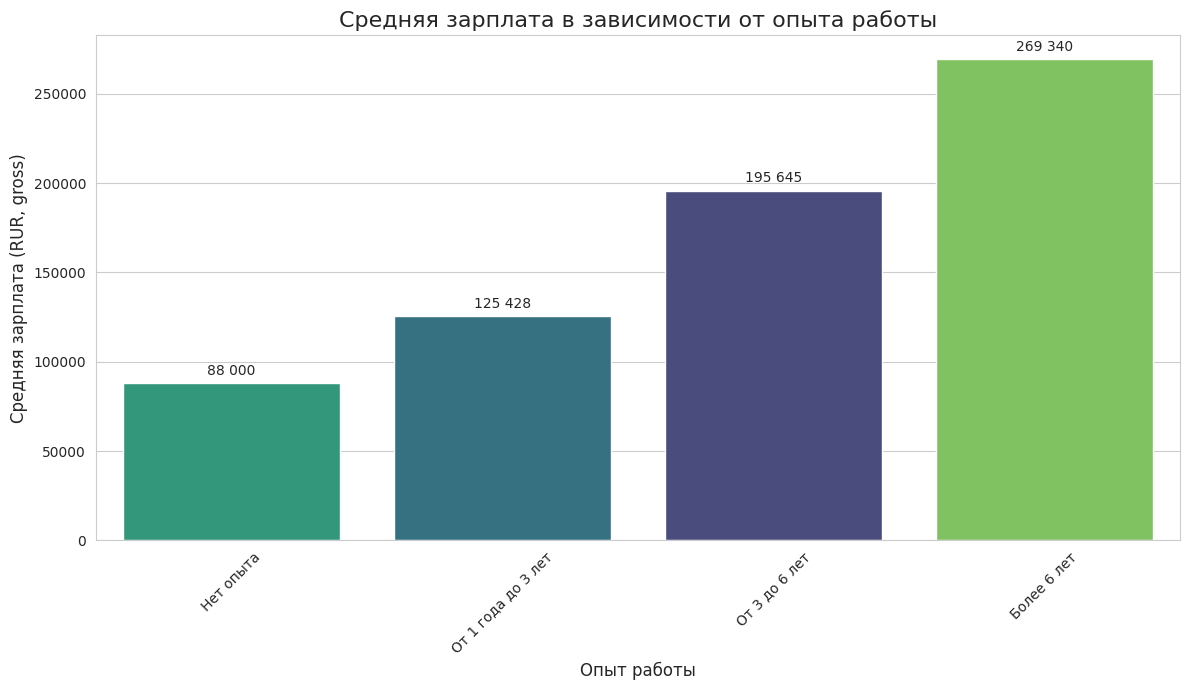

In [5]:
# Рассчитываем среднюю зарплату для каждой категории опыта
experience_salary = df.groupby('experience')['salary_avg'].mean().round(0)
print("Средняя зарплата по опыту:")
print(experience_salary)

# Визуализируем результаты
# Задаем логический порядок для сортировки на графике
experience_order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

plt.figure()
ax = sns.barplot(x='experience', y='salary_avg', data=df, order=experience_order, palette='viridis', errorbar=None, hue='experience', legend=False)

plt.title('Средняя зарплата в зависимости от опыта работы', fontsize=16)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Средняя зарплата (RUR, gross)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем подписи данных на столбцы
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(',', ' '), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

### 3. Влияние ключевых навыков на зарплату
Какие навыки сильнее всего коррелируют с высокой зарплатой? Сравним среднюю зарплату в вакансиях, где требуется определенный навык, со средней зарплатой в вакансиях, где он не упоминается.

In [6]:
skill_columns = [col for col in df.columns if col.startswith('skill_')]
salary_comparison = {}

print("Сравнение средних зарплат (с навыком vs. без навыка):\n")

for skill in skill_columns:
    salary_with_skill = df[df[skill] == True]['salary_avg'].mean()
    salary_without_skill = df[df[skill] == False]['salary_avg'].mean()
    
    # Убираем "skill_" для красивого вывода
    clean_skill_name = skill.replace('skill_', '')
    
    if not pd.isna(salary_with_skill):
        print(f"- {clean_skill_name}:")
        print(f"  - С навыком:    {salary_with_skill:,.0f} RUR".replace(',', ' '))
        print(f"  - Без навыка:   {salary_without_skill:,.0f} RUR".replace(',', ' '))
        print(f"  - Прирост:      {salary_with_skill - salary_without_skill:,.0f} RUR\n".replace(',', ' '))
        salary_comparison[clean_skill_name] = salary_with_skill - salary_without_skill

# Определяем навык с наибольшим влиянием на зарплату
top_skill_boost = max(salary_comparison, key=salary_comparison.get)
print(f"Наибольший прирост к зарплате дает знание '{top_skill_boost}'.")

Сравнение средних зарплат (с навыком vs. без навыка):

- SQL:
  - С навыком:    166 820 RUR
  - Без навыка:   129 433 RUR
  - Прирост:      37 388 RUR

- Python:
  - С навыком:    164 740 RUR
  - Без навыка:   137 844 RUR
  - Прирост:      26 896 RUR

- Pandas:
  - С навыком:    174 631 RUR
  - Без навыка:   140 949 RUR
  - Прирост:      33 682 RUR

- Excel:
  - С навыком:    130 195 RUR
  - Без навыка:   159 691 RUR
  - Прирост:      -29 496 RUR

- Power BI:
  - С навыком:    156 566 RUR
  - Без навыка:   139 152 RUR
  - Прирост:      17 414 RUR

- Tableau:
  - С навыком:    172 605 RUR
  - Без навыка:   140 046 RUR
  - Прирост:      32 558 RUR

- A/B Tests:
  - С навыком:    189 681 RUR
  - Без навыка:   140 442 RUR
  - Прирост:      49 239 RUR

- Machine Learning:
  - С навыком:    196 310 RUR
  - Без навыка:   134 240 RUR
  - Прирост:      62 071 RUR

- Git:
  - С навыком:    186 233 RUR
  - Без навыка:   142 015 RUR
  - Прирост:      44 218 RUR

- English:
  - С навыком:    161 27

### 4. Географический анализ
Рассмотрим, как зарплаты распределяются по городам России. Для чистоты анализа возьмем топ-10 городов по количеству вакансий, чтобы избежать статистических выбросов из-за малого числа данных.

Средняя зарплата в топ-10 городах по количеству вакансий:
city
Москва             172684.0
Санкт-Петербург    141281.0
Нижний Новгород    130268.0
Новосибирск        113698.0
Екатеринбург       110275.0
Краснодар          104173.0
Владивосток        102734.0
Воронеж            101175.0
Казань              99694.0
Челябинск           88571.0
Name: salary_avg, dtype: float64


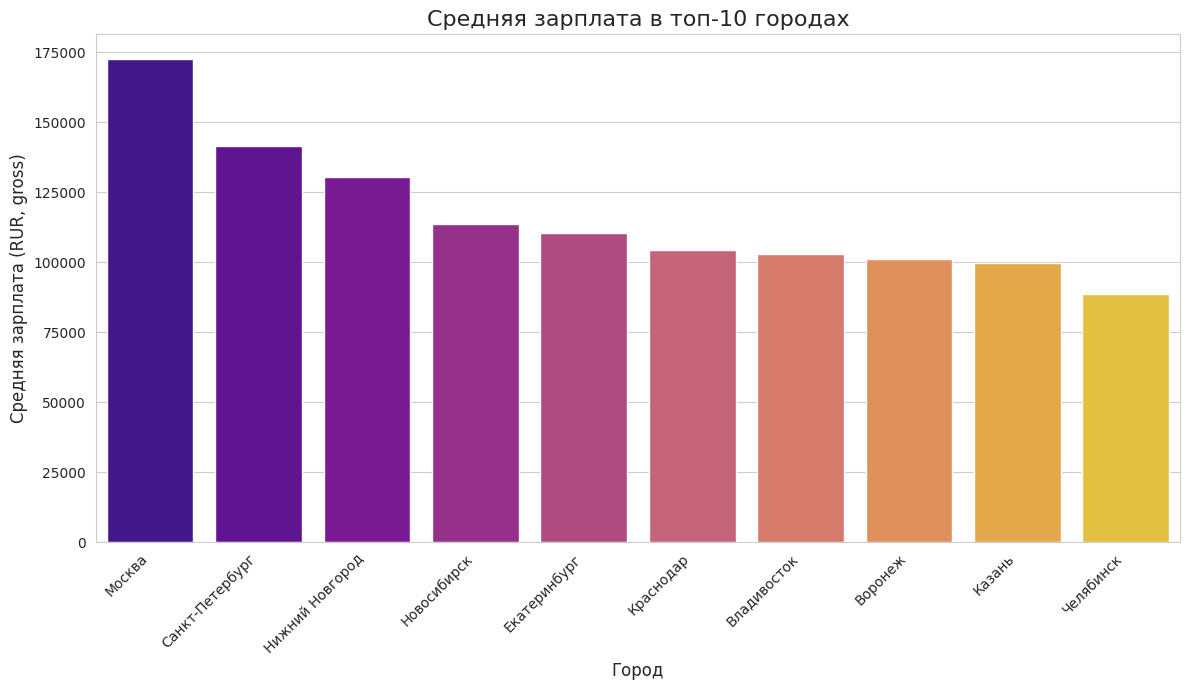

In [7]:
# Находим топ-10 городов по количеству вакансий
top_10_cities = df['city'].value_counts().nlargest(10).index

# Фильтруем DataFrame, оставляя только эти города
df_top_cities = df[df['city'].isin(top_10_cities)]

# Считаем среднюю зарплату для этих городов и сортируем
top_cities_salary = df_top_cities.groupby('city')['salary_avg'].mean().sort_values(ascending=False)

print("Средняя зарплата в топ-10 городах по количеству вакансий:")
print(top_cities_salary.round(0))

# Визуализация зарплат по городам
plt.figure()
ax = sns.barplot(x=top_cities_salary.index, y=top_cities_salary.values, palette='plasma', hue=top_cities_salary.index, legend=False)
plt.title('Средняя зарплата в топ-10 городах', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Средняя зарплата (RUR, gross)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🏁 Итоги и выводы

Проведенный анализ позволил сформировать детальное представление о рынке труда для аналитиков данных в России:

1.  **Опыт — главный драйвер роста:** карьерный рост от Junior до Senior-специалиста сопровождается значительным и предсказуемым увеличением дохода.
2.  **Навыки определяют специализацию и доход:** базовые инструменты (SQL, Excel) являются стандартом, в то время как продвинутые навыки (Machine Learning, A/B-тестирование) открывают доступ к более высокооплачиваемым позициям.
3.  **Рынок сильно централизован:** Москва и Санкт-Петербург остаются ключевыми центрами притяжения для аналитиков как по количеству предложений, так и по уровню зарплат.

Этот проект демонстрирует полный цикл работы с данными: от сбора и очистки до глубокого анализа и создания интерактивного инструмента для принятия решений.

**Для дальнейшего исследования приглашаю вас воспользоваться [интерактивным дашбордом на Tableau Public](https://public.tableau.com/views/Data-_17612546361120/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).**